In [40]:
# prerequisite package imports
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
sns.set(style="whitegrid", palette="pastel", color_codes=True)
%matplotlib inline

## Example 1 

In [3]:
tips = sns.load_dataset("tips")
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
total_bill    244 non-null float64
tip           244 non-null float64
sex           244 non-null category
smoker        244 non-null category
day           244 non-null category
time          244 non-null category
size          244 non-null int64
dtypes: category(4), float64(2), int64(1)
memory usage: 7.2 KB


In [4]:
tips.sample()

,total_bill,tip,sex,smoker,day,time,size
2,21.01,3.5,Male,No,Sun,Dinner,3


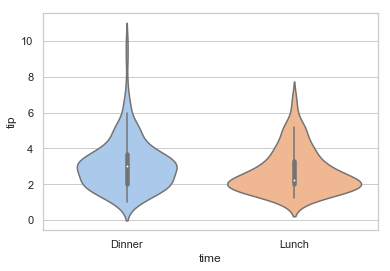

In [5]:
sns.violinplot(x="time", y="tip",data=tips, order=['Dinner','Lunch'])

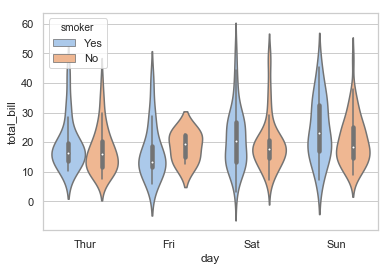

In [6]:
sns.violinplot(x="day", y="total_bill", hue="smoker",data=tips, splits=True)

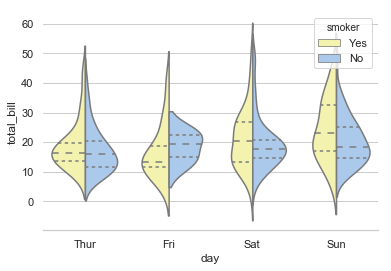

In [7]:
# Draw a nested violinplot and split the violins for easier comparison
sns.violinplot(x="day", y="total_bill", hue="smoker",
               split=True, inner="quartile",
                palette={"Yes": "y", "No": "b"},
               data=tips)
sns.despine(left=True)

# inner is divider of two day with different type of shape  

## Example 2

In [8]:
# Create a random dataset across several variables
rs = np.random.RandomState(0)

In [11]:
n, p = 40, 8
d = rs.normal(0, 2, (n, p))
d += np.log(np.arange(1, p + 1)) * -5 + 10
# if i just open d data. It would be hard to get all information 
# so i use Dataframe from Pandas
d = pd.DataFrame(d)
d.shape   # that's why n = 40, p = 8 
d.sample(3)

,0,1,2,3,4,5,6,7
38,9.249706,4.081872,4.873617,6.410414,1.840544,1.038433,-1.104149,-0.632157
8,10.077261,3.220834,2.535917,0.124858,5.249080,1.369658,1.405030,-0.842558
14,11.737927,7.088008,2.564729,3.698163,3.595982,1.051788,1.871579,-0.240687


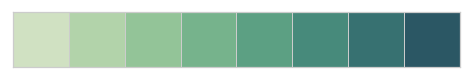

In [13]:
# Use cubehelix to get a custom sequential palette
pal = sns.cubehelix_palette(p, rot=-.5, dark=.3)
# palette is color option 
sns.palplot(pal)

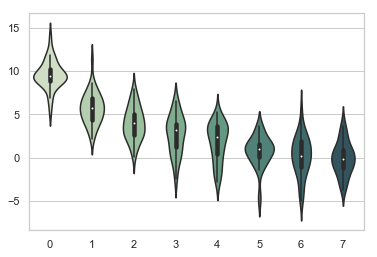

In [14]:
# Show each distribution with both violins and points
sns.violinplot(data=d, palette=pal, inner="box" )

# another option of inner : point,quartile,sticks

## Example 3

In [31]:
df = pd.read_csv('fuel_econ.csv')
df.columns

Index(['id', 'make', 'model', 'year', 'VClass', 'drive', 'trans', 'fuelType',
       'cylinders', 'displ', 'pv2', 'pv4', 'city', 'UCity', 'highway',
       'UHighway', 'comb', 'co2', 'feScore', 'ghgScore'],
      dtype='object')

In [35]:
df['VClass'].value_counts()

Midsize Cars        1188
Compact Cars        1122
Subcompact Cars      673
Large Cars           625
Minicompact Cars     321
Name: VClass, dtype: int64

**Question** 
: What is the relationship between 'comb' and 'VClass'?. The cars in this dataset are categorized into one of five different vehicle classes based on size. Starting from the smallest, they are: {Minicompact Cars, Subcompact Cars, Compact Cars, Midsize Cars, and Large Cars}.

In [37]:
sedan_classess = ['Minicompact Cars','Subcompact Cars','Compact Cars','Midsize Cars','Large Cars']

v_class = pd.api.types.CategoricalDtype(ordered=True,categories=sedan_classess) 
#Type for categorical data with the categories and orderedness
df['VClass'] = df['VClass'].astype(v_class);

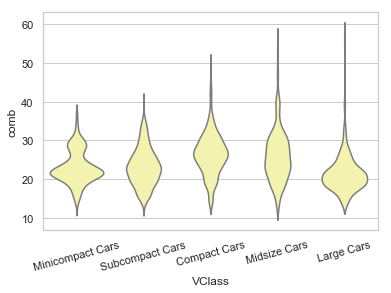

In [50]:
base_color = sns.color_palette()[8]
sns.violinplot(data=df,x='VClass',y='comb',color=base_color,inner=None)
plt.xticks(rotation=15); # or vertical 

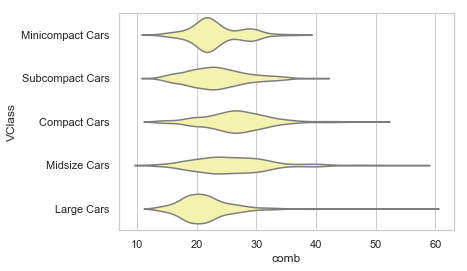

In [53]:
base_color = sns.color_palette()[8]
sns.violinplot(data=df,y='VClass',x='comb',color=base_color,inner=None);
# same data as before but variables of x and y are changed each other